In [113]:
import pandas as pd
import numpy as np
import string

from nltk.stem.snowball import ItalianStemmer
from nltk.corpus import stopwords
#from nltk.stem import ItalianStemmer
from nltk.tokenize import word_tokenize

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [116]:
# Dirty work: merging documents 

        # first csv (downloaded by Mic)  # second and third csv (downloaded by Paolo)
allFiles = ['data/raw_data_BACKUP.csv', 'data/raw_data1.csv', 'data/raw_data2.csv']

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

frame = pd.concat(list_, axis = 0, ignore_index = True)

print('first len:', len(frame))
# drop first column 'unnamed: 0'
frame = frame.drop('Unnamed: 0', axis=1)
frame.drop_duplicates(inplace=True)

frame = frame[:10000]
print('new len:', len(frame))

frame.to_csv('data/raw_data.csv',index_label=False)

first len: 14759
new len: 10000


In [117]:
frame

,title,price,locali,superficie,bagni,piano,description
0,Nuovi Appartamenti e Attici / Mansarde in Vend...,€ 192.000 - € 705.000,1 - 5,46.0,NaN,NaN,\n Le residenze...
1,"Bilocale viale Italo Calvino, Fonte Ostiense, ...",€ 225.000,2,50.0,1,1 \n,\n PAPILLO EUR ...
2,"Quadrilocale via Alessandro Fleming, Fleming, ...",€ 1.350.000,4,200.0,2,2 \n,\n FLEMING - IN...
3,"Quadrilocale via Aosta 45, Re di Roma, Roma",€ 450.000,4,135.0,1,A \n,\n Rif: 18086 -...
4,"Attico / Mansarda largo Arturo Donaggio, Torre...",€ 135.000,2,60.0,1,5 \n,\n Torrevecchia...
5,"Villa via Cristoforo Sabbadino 88, Piana del S...",€ 229.000,5,169.0,3+,NaN,\n a soli € 229...
6,"Bilocale viale delle Medaglie d'Oro 124, Medag...",€ 249.000,2,75.0,1,1 \n,"\n Balduina, ad..."
7,"Villa via Saturnia, San Giovanni, Roma",€ 2.500.000,5+,625.0,3+,NaN,\n A due passi ...
8,"Bilocale via Savona, Villa Fiorelli, Roma",€ 339.000,2,70.0,1,3 \n,\n In Via Savon...
9,"Bilocale via Silicella 17, Tor Tre Teste - Tor...",€ 115.000,2,58.0,1,3 \n,\n Rif: 18028 -...


In [118]:
# price_preprocessing
def price_prep(s):
    
    # removing punctuation and symbols
    s = s.replace('.','')
    s = s.replace('€','')
    s = s.strip(' ')
    s = s.split('-')

    # return first value
    # or the mean between the two
    if len(s) == 1:
        return float(s[0])
    else:
        min_price = float(s[0])
        max_price = float(s[1])
    return (min_price+max_price)/2


# locali preprocessing
def locali_preproc(s):
    s = s.strip()
    s = s.replace('+','')
    return int(s[len(s)-1])



# no need superficie (already float values)

# bagni preproc on place


# piano preprocessing
def piano_preproc(x):
    
    x = str(x)
    x = x.strip()
    
    if x == 'T':
        return 0
    elif x == 'A' or x == '11+':
        return np.nan #return nan
    elif x == 'R':
        return 0.5
    elif x == 'S':
        return -1
#   elif x == '11+':
#      return 11
    else:
        return float(x)


# description preprocessing DEPRECATED
def description_preproc(description):

    description = description.strip()
    description = description.replace("\n", " ")
    description = description.replace('\r', " ")
    description = description.replace('’', " ")
    
    sp = string.punctuation+'“”–’°•€'
    punctuation_remover = str.maketrans('', '', sp)
    
    description = description.split(' ')
    
    # removing punctuation
    description = [ word.translate(punctuation_remover) for word in description ]
    
    #removing empty spaces in the list 
    description = filter(None, description)
    
    # Italian stemmer
    stemmer = ItalianStemmer()
    # stemmed list
    stemmed_list = [stemmer.stem(word) for word in description]
    
    
    return ' '.join(stemmed_list)


# from previous hw, we can reuse our code
def remove_step(doc):
    """
    takes as input the string of the document
    removes stopwords, punctuation and makes stemming 
    input:
    - string of document
    output:
    - list of term after stemming process
    
    """
    
    # check if it's a nan value 

    if isinstance(doc, float):
        return str(doc)
    
    sp = string.punctuation+'“”–’°•€'
    
    doc=doc.replace("\\n", " ")
    # punctuations
    doc = [ c if c not in sp else " " for c in doc ]
    doc = ''.join(doc)
    # stopwords
    doc = [ word for word in doc.split() if word.lower() not in stopwords.words('italian') ]
    doc = ' '.join(doc)
    
    # stemming
    ps = ItalianStemmer()
    words = word_tokenize(doc)
    
    w_lst = []
    for w in words:
        w_lst.append(ps.stem(w))
    
    # something else
    
    return ' '.join(w_lst)

In [119]:
# load csv file
df = pd.read_csv('data/raw_data.csv')

# delete rows with na values
df.dropna(inplace=True)


# price prep
df = df[df.price.str.contains('[a-zA-Z]') == False]
df.price = df.price.map(price_prep)
df = df[df.price > 2000 ]

# locali prep
df.locali = df.locali.map(locali_preproc)

# superficie doesn't needs prep

# bagni prep
df.bagni = df.bagni.map(lambda x: int(x[0]))

# piano prep
df.piano = df.piano.map(piano_preproc)

# stemming description
df['description_stemmed'] = df.description.map(description_preproc)
#remove na
df.dropna(inplace=True)
#df.drop('Unnamed: 0', axis = 1, inplace=True) 

df.to_csv('data/data_preprocessed.csv', index=False)

In [121]:
len(df)

7383

In [122]:
# TRY TO TAKE THE FILE
df = pd.read_csv('data/data_preprocessed.csv')

In [123]:
df.head()

,title,price,locali,superficie,bagni,piano,description,description_stemmed
0,"Bilocale viale Italo Calvino, Fonte Ostiense, ...",225000.0,2,50.0,1,1.0,\n PAPILLO EUR ...,papill eur in eleg compless residenzial rifini...
1,"Quadrilocale via Alessandro Fleming, Fleming, ...",1350000.0,4,200.0,2,2.0,\n FLEMING - IN...,fleming in strad priv via alessandr fleming si...
2,"Attico / Mansarda largo Arturo Donaggio, Torre...",135000.0,2,60.0,1,5.0,\n Torrevecchia...,torrevecc adiacent larg artur donagg appart in...
3,"Bilocale viale delle Medaglie d'Oro 124, Medag...",249000.0,2,75.0,1,1.0,"\n Balduina, ad...",balduin adiacent piazz giovenal appart in vend...
4,"Bilocale via Savona, Villa Fiorelli, Roma",339000.0,2,70.0,1,3.0,\n In Via Savon...,in via savon una strad tranquill nel cuor di s...


In [48]:
df.iloc[5151].description_stemmed

'rif t128 in zon mont di cret e più precis in via francesc schupfer in un eleg condomin con giardin priv dal qual si god un meravigl panoram ammir la cupol di spietr propon la vend di uno splendid appart sit in una palazzin di 6 pian l immobil situ al 6 pian si apre su un ampi disimpegn che conduc dirett in un gradevolissim salon con camin con access dirett sul terrazz principal un ulterior ingress conduc nell second ala dell appart dov son situ le 3 stanz da lett di cui una con access su un altro terrazz di metratur legger più piccol di quell principal la cucin con ulterior balcon e ripostigl e due bagn di cui uno padronal l appart si present da ristruttur pur essend in una zon ricc di negoz e mezz pubblic nell vicin ha la tranquill dell qual tutt vorrebber god torn a cas per la tipolog dell struttur è una cas che offre grand vantagg uno dei qual la possibil poter ten ben distint e separ la zon living dall zon nott la presenz di un ampi box e di due cantin rend total la comod di quest

# K-Means with 5 features: price, locali, superficie, bagni, piano

In [124]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [125]:
df_features = pd.read_csv('data/data_preprocessed.csv', usecols=['price', 'locali', 'superficie', 'bagni', 'piano'])
df_features.head()

,price,locali,superficie,bagni,piano
0,225000.0,2,50.0,1,1.0
1,1350000.0,4,200.0,2,2.0
2,135000.0,2,60.0,1,5.0
3,249000.0,2,75.0,1,1.0
4,339000.0,2,70.0,1,3.0


In [126]:
#mms = StandardScaler() # instead of MinMaxScaler()<- used for cathegorigal stuff!
mms = MinMaxScaler()
mms.fit(df_features)
data_transformed = mms.transform(df_features)

In [127]:
data_transformed

array([[0.01715404, 0.25      , 0.05429462, 0.        , 0.18181818],
       [0.11872398, 0.75      , 0.2211838 , 0.5       , 0.27272727],
       [0.00902844, 0.25      , 0.06542056, 0.        , 0.54545455],
       ...,
       [0.06455334, 1.        , 0.3435692 , 1.        , 0.36363636],
       [0.02302252, 0.5       , 0.09323543, 0.5       , 0.18181818],
       [0.01300095, 0.5       , 0.0987984 , 0.        , 0.13636364]])

In [128]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

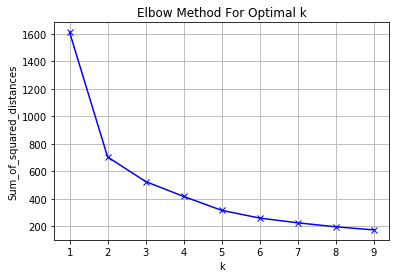

In [129]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [130]:
Sum_of_squared_distances

[1610.7787372177252,
 704.0820364511605,
 525.2314968991112,
 417.0529079261276,
 316.0042690692719,
 259.870833950713,
 225.35430512190158,
 196.3266543635666,
 173.91394156582496]

In [131]:
from sklearn.cluster import KMeans

In [132]:
kmeans = KMeans(n_clusters=4, random_state=1234).fit(data_transformed)

In [133]:
clusters = kmeans.predict(data_transformed)

In [134]:
df['features_clusters'] = clusters

In [135]:
df.head()

,title,price,locali,superficie,bagni,piano,description,description_stemmed,features_clusters
0,"Bilocale viale Italo Calvino, Fonte Ostiense, ...",225000.0,2,50.0,1,1.0,\n PAPILLO EUR ...,papill eur in eleg compless residenzial rifini...,1
1,"Quadrilocale via Alessandro Fleming, Fleming, ...",1350000.0,4,200.0,2,2.0,\n FLEMING - IN...,fleming in strad priv via alessandr fleming si...,0
2,"Attico / Mansarda largo Arturo Donaggio, Torre...",135000.0,2,60.0,1,5.0,\n Torrevecchia...,torrevecc adiacent larg artur donagg appart in...,1
3,"Bilocale viale delle Medaglie d'Oro 124, Medag...",249000.0,2,75.0,1,1.0,"\n Balduina, ad...",balduin adiacent piazz giovenal appart in vend...,1
4,"Bilocale via Savona, Villa Fiorelli, Roma",339000.0,2,70.0,1,3.0,\n In Via Savon...,in via savon una strad tranquill nel cuor di s...,1
